#  <center>Prediction using Supervised ML title</center>

## <center>(Level - Beginner) title</center>

## The Sparks Foundation - GRIP
###  Data Science & Business Analytics   <center>TASK 1 </center>
### <font color=red>Predicting the percentage of an student based on the number of study hours.</font> 

#### Data source="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

##### Attribute=Number of Hours Studied

##### Target Variable=Scores

### <font color=indigo><div style="text-align: right"> By:-Mohammed Sufiyan Abdullah Ghori </div></font>

# _READING DATA_

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### The data consist of 25 records.

#### The above table gives some basic statistical details of the data.

# _VISUALIZING THE DATA_

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Percentage Score')

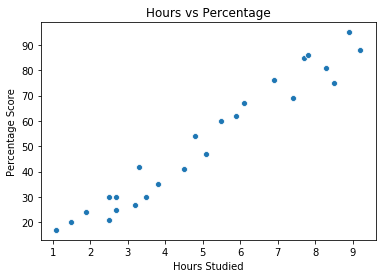

In [5]:
sns.scatterplot(data=data, x="Hours", y="Scores")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

#### The data is linear so we can use a linear regression 
## y=mx+c.

#### where 
### y=percentage score ,  x=hours studied ,  m=slope of the regression line ,   c= intercept

Text(0, 0.5, 'Percentage Score')

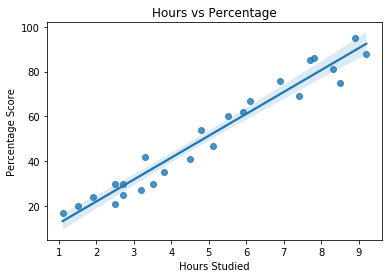

In [6]:
sns.regplot(data=data, x="Hours", y="Scores")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

# _SEPARATING ATTRIBUTE AND  TARGET VARIABLE_

In [7]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

# _SPLITTING THE DATA_

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
#TEST SIZE IS 0.2 ie 20% DATA IS KEPT SEPARATE FOR TESTING
#random_state is set to zero to return same results for each execution.

In [9]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  #Model created
regressor.fit(X_train, Y_train) #Data fitted

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print("The coefficient m is",regressor.coef_)
print("The intercept c is",regressor.intercept_)

The coefficient m is [9.91065648]
The intercept c is 2.018160041434683


We can use the parameters(results) from our model to draw the regression line 

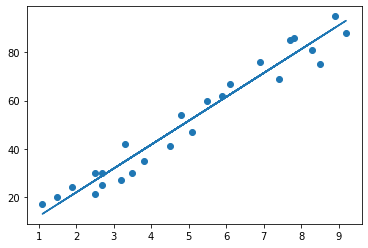

In [11]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [12]:
print(X_test) # Testing data 
Y_pred = regressor.predict(X_test)# Predicting Percentage Scored of test data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual Percentage,Predicted Percentage
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


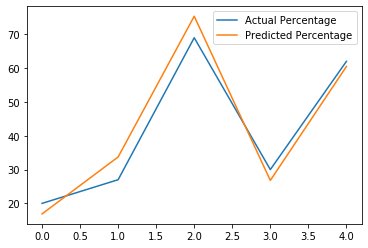

In [13]:
# Actual Result vs Predicted Result
df = pd.DataFrame({'Actual Percentage': Y_test, 'Predicted Percentage': Y_pred})  
df.plot()
df

# _EVALUATING OUR MODEL_

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))
print('r2 score:', 
     metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
r2 score: 0.9454906892105356


R-squared is a statistical measure of how close the data are to the fitted regression line.

An r2 score of 0.94 is a good value.

# Calculating the predicted score if a student studies for 9.25 hrs/ day

In [15]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# The predicted Score if a student studies 9.25 hours/day is 93.69%.

# <font color=blue><center>THANK YOU </center></font>